This notebook sets up the workflow for the various functions we have implemented. It shows an example of how we clustered using Nonnegative Matrix Factorization. We manually inspect the output of NMF to determine the best number of clusters for each group

In [1]:
import random
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from utils.clean_up import *
from utils.categorize_demographics import *
from utils.nonnegative_matrix_factorization import nmf_inspect, nmf_labels

warnings.filterwarnings('ignore')
%matplotlib inline

/Users/JS/.virtualenvs/test/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
mpl.rc('savefig', dpi=300)
params = {'figure.dpi' : 300,
          'axes.axisbelow' : True,
          'lines.antialiased' : True}

for (k, v) in params.items():
    plt.rcParams[k] = v

In [3]:
essay_dict = {'essay0' : 'My self summary',
              'essay1' : 'What I\'m doing with my life',
              'essay2' : 'I\'m really good at',
              'essay3' : 'The first thing people notice about me',
              'essay4' : 'Favorite books, movies, tv, food',
              'essay5' : 'The six things I could never do without',
              'essay6' : 'I spend a lot of time thinking about',
              'essay7' : 'On a typical Friday night I am',
              'essay8' : 'The most private thing I am willing to admit',
              'essay9' : 'You should message me if'}

Getting the data, cleaning it, and categorizing demographic data

In [4]:
df = pd.read_csv('data/profiles.20120630.csv')

In [5]:
essay_list = ['essay4']
df_clean = clean_up(df, essay_list)

In [6]:
df_clean.shape

(48105, 32)

In [7]:
df_clean.fillna('', inplace=True)

In [8]:
df_clean['religion'] = df_clean['religion'].apply(religion_categories)
df_clean['job'] = df_clean['job'].apply(job_categories)
df_clean['drugs'] = df_clean['drugs'].apply(drug_categories)
df_clean['diet'] = df_clean['diet'].apply(diet_categories)
df_clean['body_type'] = df_clean['body_type'].apply(body_categories)
df_clean['drinks'] = df_clean['drinks'].apply(drink_categories)
df_clean['sign'] = df_clean['sign'].apply(sign_categories)
df_clean['ethnicity'] = df_clean['ethnicity'].apply(ethnicity_categories)
df_clean['pets'] = df_clean['pets'].apply(pets_categories)
df_clean['speaks'] = df_clean['speaks'].apply(language_categories)

In [9]:
count_matrix, tfidf_matrix, vocab = col_to_data_matrix(df_clean, essay_list[0])

In [10]:
K = 25

In [11]:
df_clean['group'] = nmf_labels(tfidf_matrix, k=K)

### Sex

In [12]:
count_m = count_matrix[np.array((df_clean.group==24) & (df_clean.sex=='m')), :]
count_f = count_matrix[np.array((df_clean.group==24) & (df_clean.sex=='f')), :]

In [13]:
blah = pd.DataFrame({'m' : np.array(count_m.sum(axis=0))[0],
                     'f' : np.array(count_f.sum(axis=0))[0],
                     'vocab' : vocab})

In [14]:
blah['f'] = blah.f / blah.f.sum()
blah['m'] = blah.m / blah.m.sum()

In [15]:
blah['diff'] = blah.f - blah.m

In [16]:
blah.sort('diff', ascending=False, inplace=True)
blah.reset_index(drop=True, inplace=True)

In [17]:
blah_t100 = blah[:100].copy()

In [18]:
blah_t100['diff'] = np.round(np.abs(blah_t100['diff']) * 10000, 0)

In [19]:
v = blah_t100['vocab'].tolist()
c = blah_t100['diff'].tolist()

In [20]:
wf = list(zip(v, c))

In [21]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

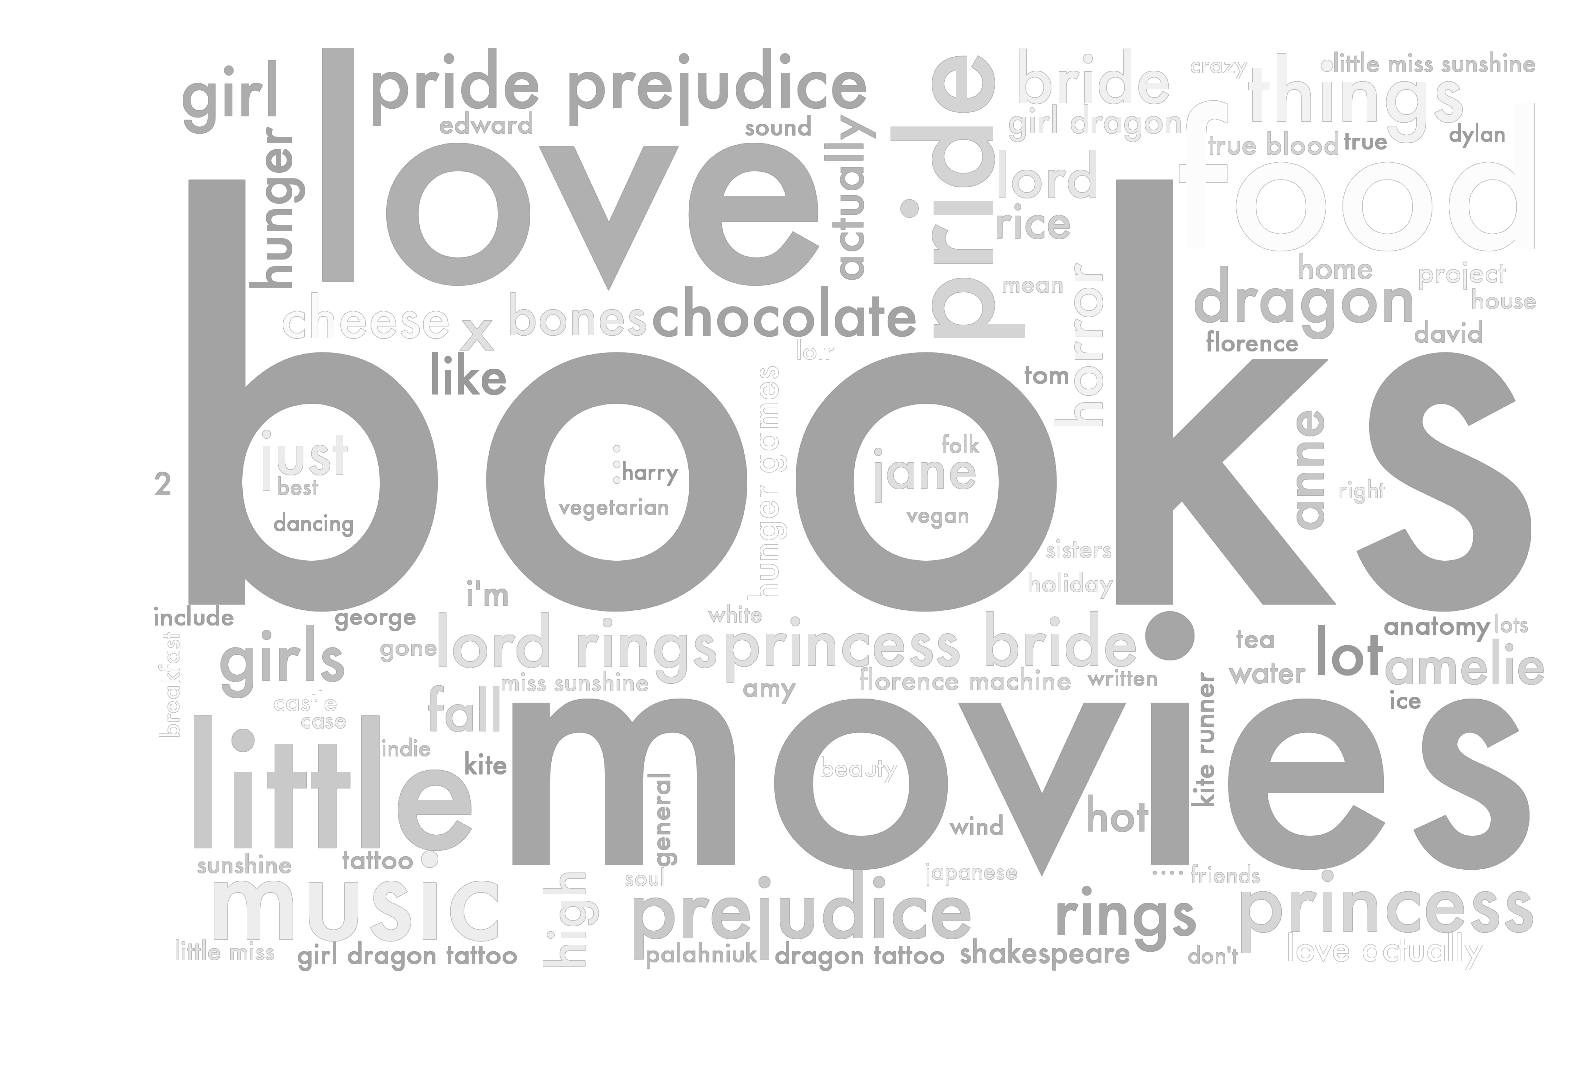

In [22]:
wc = WordCloud(background_color=None, mode='RGBA',
               width=2400, height=1600, relative_scaling=0.5,
               font_path='/Library/Fonts/Futura.ttc')
wc.generate_from_frequencies(wf)
plt.figure()
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=42))
plt.axis("off")
plt.savefig('/Users/JS/Desktop/female.png', dpi=300, transparent=True)

In [23]:
blah_b100 = blah[-100:].copy()
blah_b100['diff'] = np.round(np.abs(blah_b100['diff']) * 10000, 0)
v = blah_b100['vocab'].tolist()
c = blah_b100['diff'].tolist()
wf = list(zip(v, c))

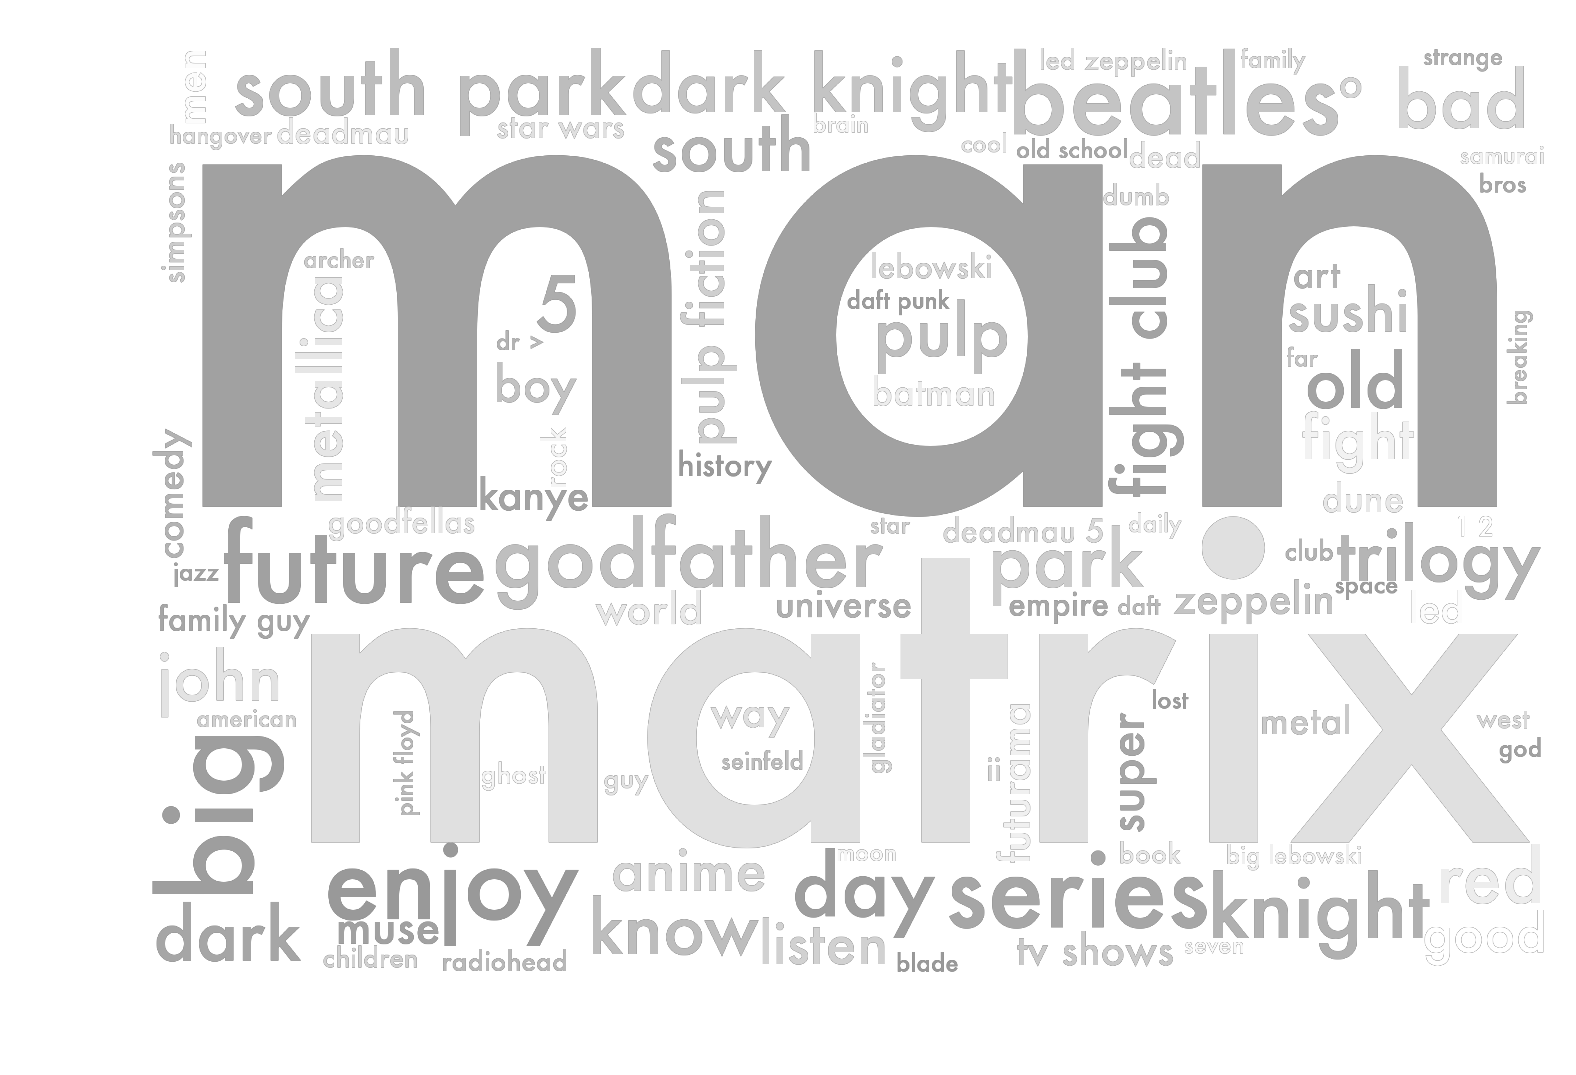

In [24]:
wc = WordCloud(background_color=None, mode='RGBA',
               width=2400, height=1600, relative_scaling=0.5,
               font_path='/Library/Fonts/Futura.ttc')
wc.generate_from_frequencies(wf)
plt.figure()
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=42))
plt.axis("off")
plt.savefig('/Users/JS/Desktop/male.png', dpi=300, transparent=True)

In [25]:
n=75

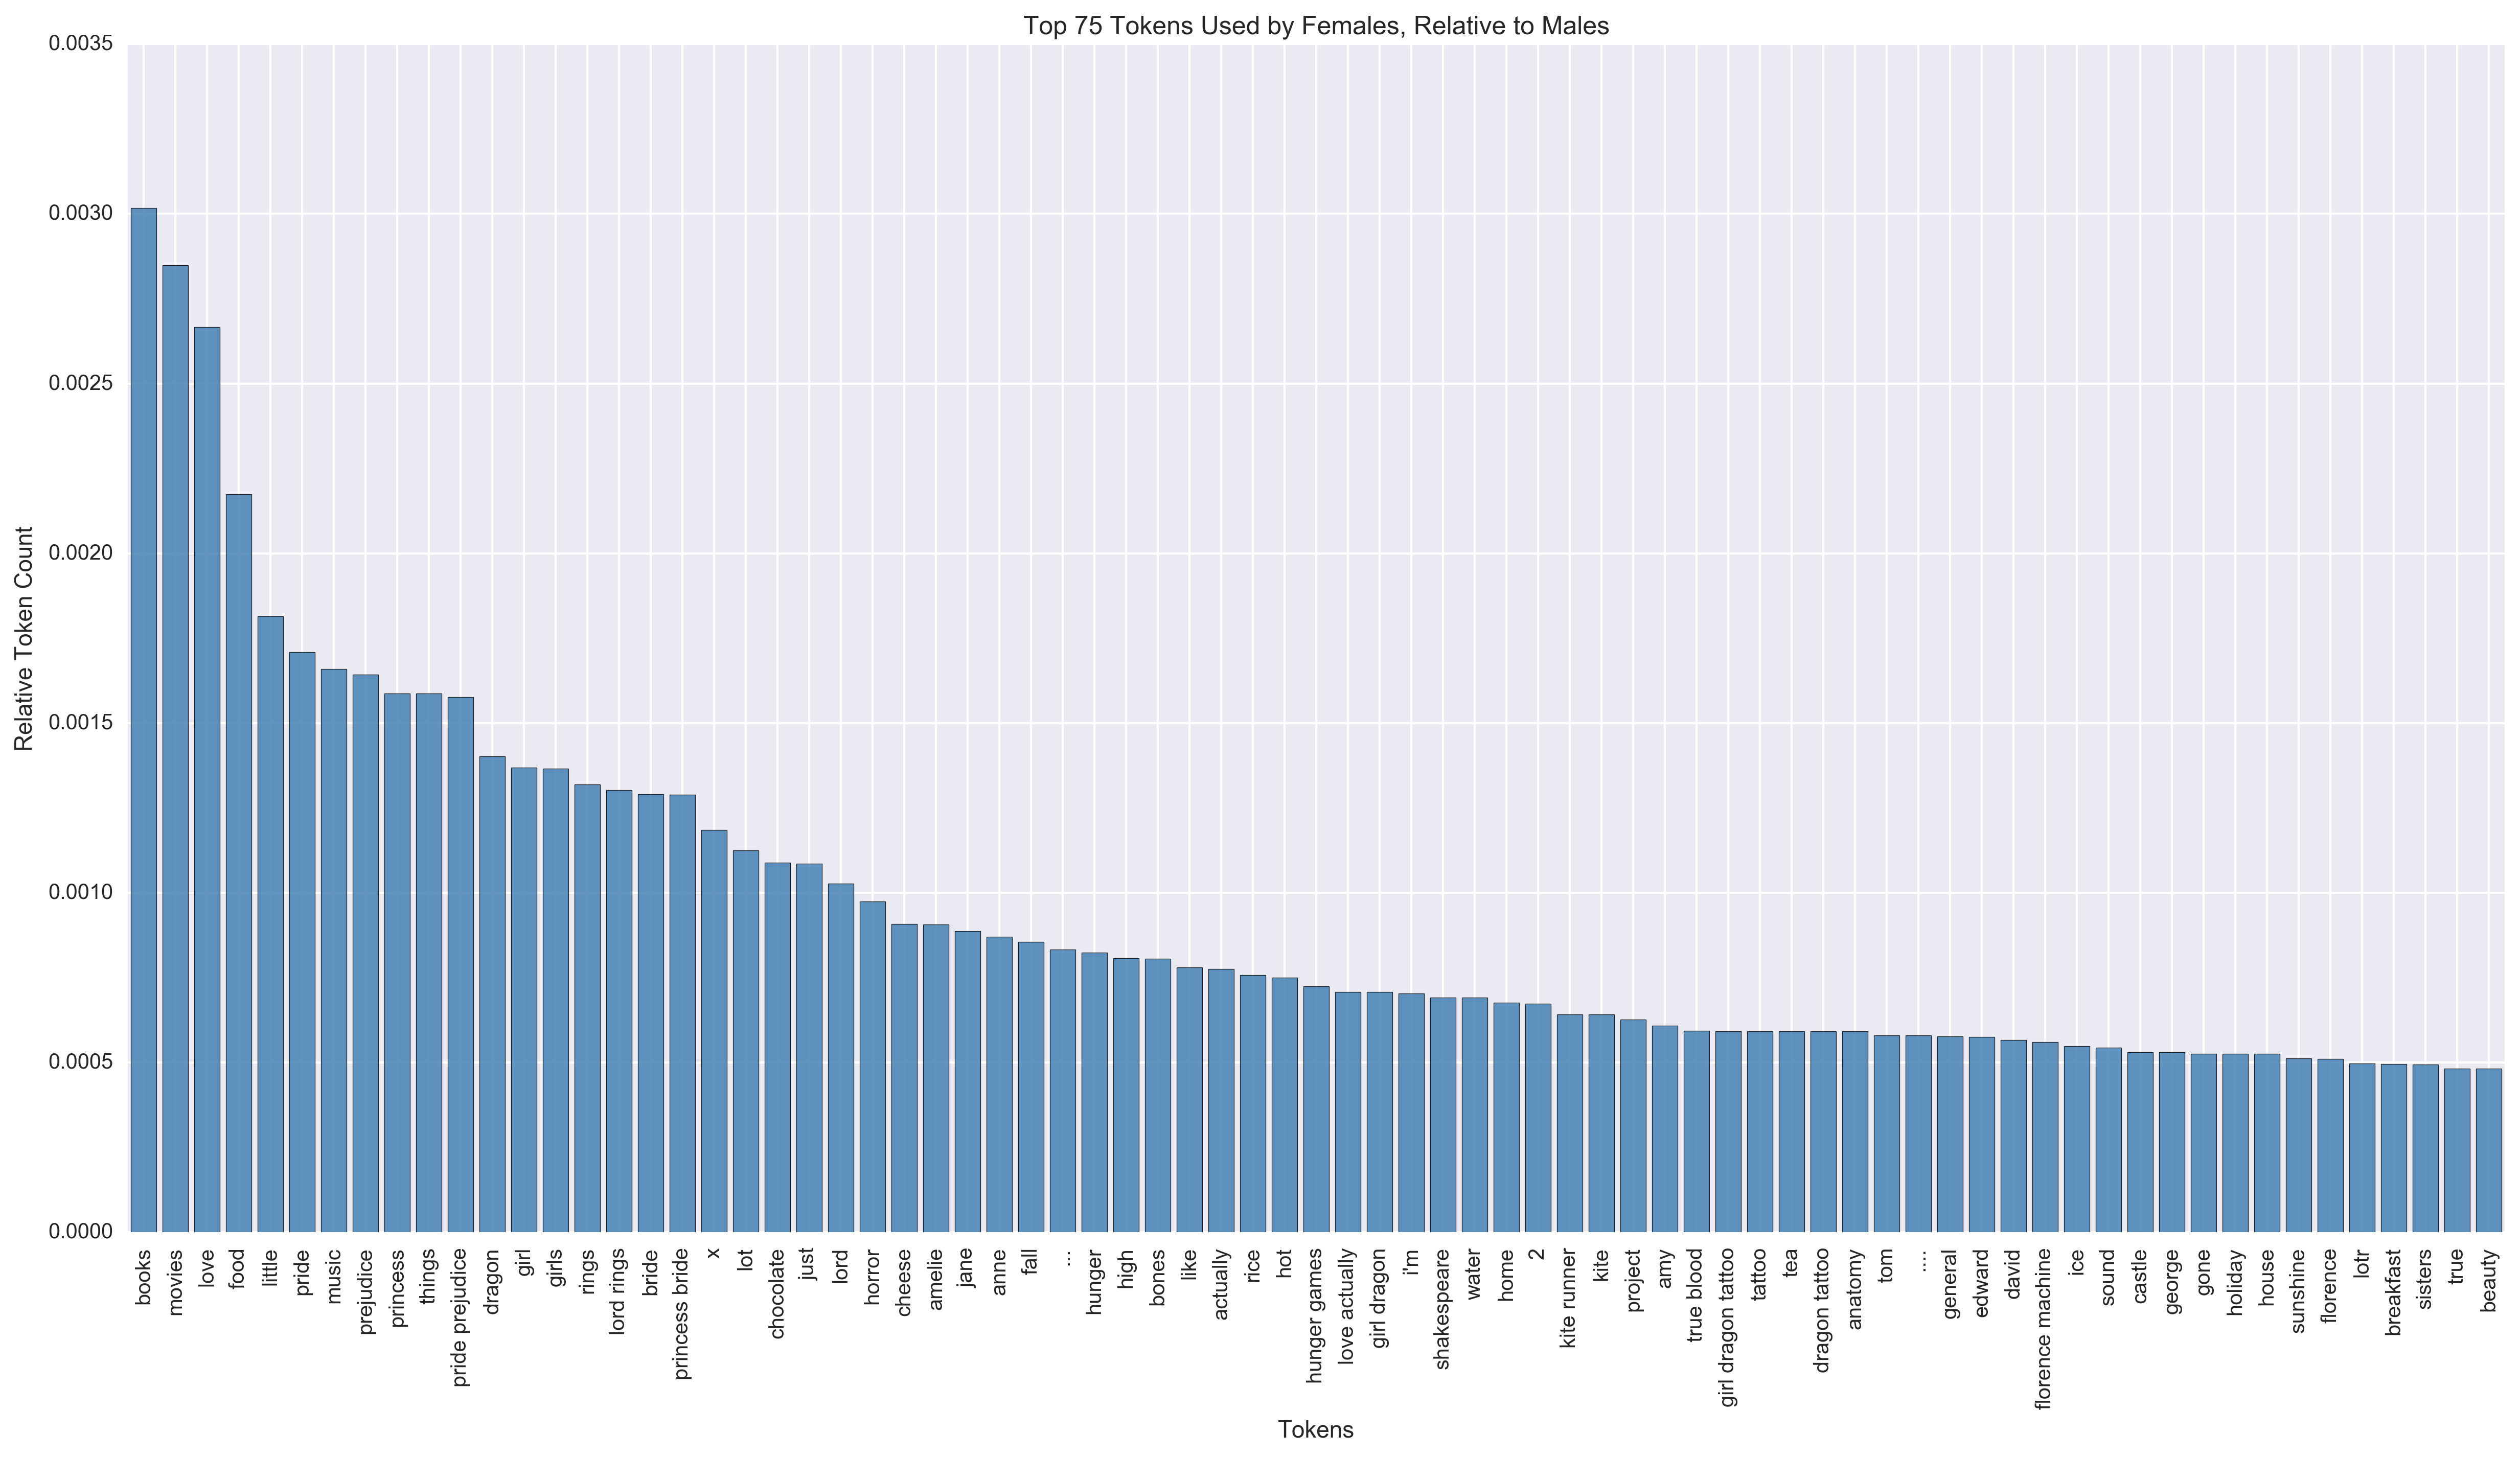

In [26]:
plt.figure(figsize=(20, 10))

plt.bar(blah.index[:n], blah['diff'][:n], align='center', alpha=0.85, color='SteelBlue')

plt.xticks(blah.index[:n].tolist(), blah.vocab[:n].tolist(), rotation=90);

plt.title('Top {0} Tokens Used by Females, Relative to Males'.format(n))
plt.xlabel('Tokens')
plt.ylabel('Relative Token Count')

plt.xlim(-0.5, blah.index[:n].max()+0.5);

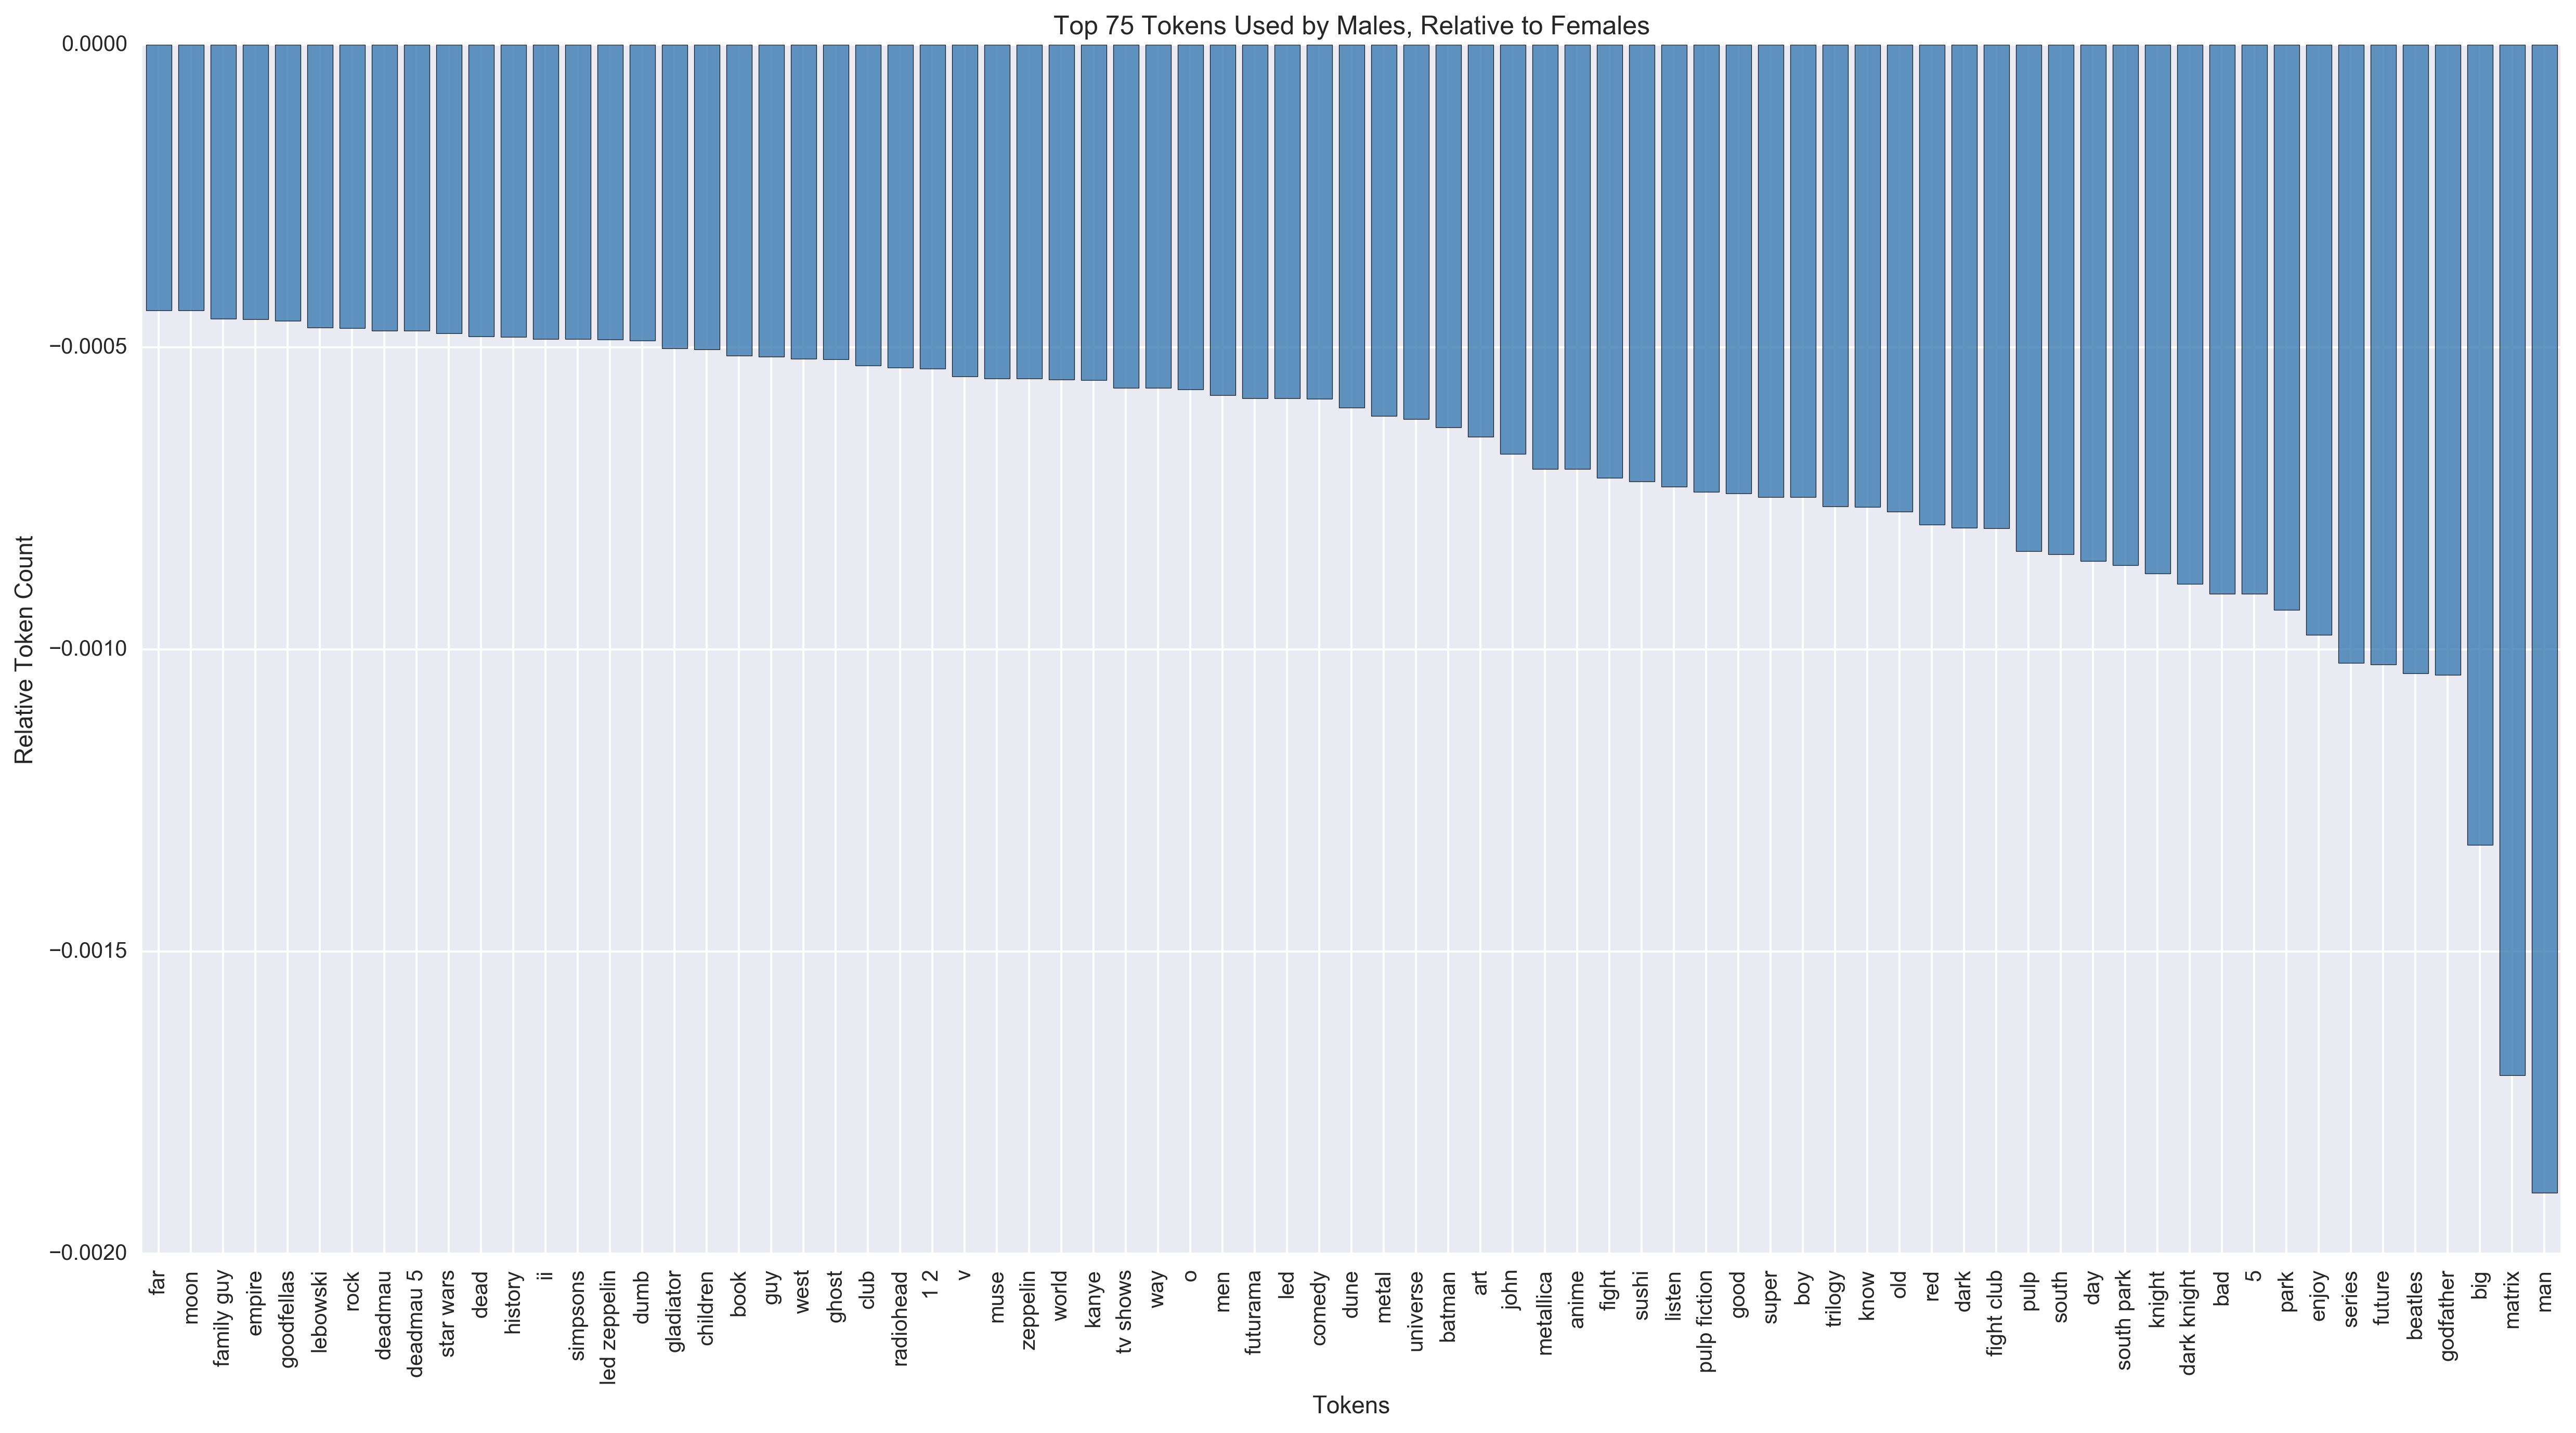

In [27]:
plt.figure(figsize=(20, 10))

plt.bar(blah.index[-n:], blah['diff'][-n:], align='center', alpha=0.85, color='SteelBlue')

plt.xticks(blah.index[-n:].tolist(), blah.vocab[-n:].tolist(), rotation=90);

plt.title('Top {0} Tokens Used by Males, Relative to Females'.format(n))
plt.xlabel('Tokens')
plt.ylabel('Relative Token Count')

plt.xlim(blah.index[-n:].min()-0.5, blah.index[-n:].max()+0.5);